#### Recommender Systems

- Collaborative filtering
- Content-based filtering

In [ ]:
import tensorflow as tf

w = tf.Variable(3.0)
x = 1.0
y = 1.0
alpha = 0.01

iterations = 30
for iter in range(iterations):
    with tf.GradientTape() as tape:
        fwb = w*x
        costJ = (fwb - y) ** 2
    [dJdw] = tape.gradient(costJ, [w])
    w.assign_add(-alpha * dJdw)


In [ ]:
# import tensorflow.keras as keras

# optimizer = keras.optimizers.Adam(learning_rate=1e-1)

# iterations = 200
# for iter in range(iterations):
#     with tf.GradientTape() as tape:
#         cost_val = cofiCostFuncV(X, W, b, Ynorm, R, num_users, num_movies, lambda_)
#     grads = tape.gradient(cost_val, [X, W, b])
#     optimizer.apply_gradient(zip(grads, [X, W, b]))

In [ ]:
# Content Based Filtering Approach

from tensorflow.keras import models, layers, losses
import tensorflow as tf
from tensorflow.keras import Model

user_NN = models.Sequential([
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(32),
])

item_NN = models.Sequential([
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(32),
])

num_user_features = 20
num_item_features = 50

input_user = layers.Input(shape=(num_user_features,))
vu = user_NN(input_user)
vu = tf.linalg.l2_normalize(vu, axis=1)

input_item = layers.Input(shape=(num_item_features,))
vm = item_NN(input_item)
vm = tf.linalg.l2_normalize(vm, axis=1)

output = layers.Dot(axes=1)([vu, vm])

model = Model([input_user, input_item], output)

cost_fn = losses.MeanSquaredError()

- PCA Usage:
	- Visualization: 10-50 features data reduced to 2-3 features so easy to visualize most of the information.
	- Data Compression.
	- Speeding up training of supervised learning model by reducing the less informative features.

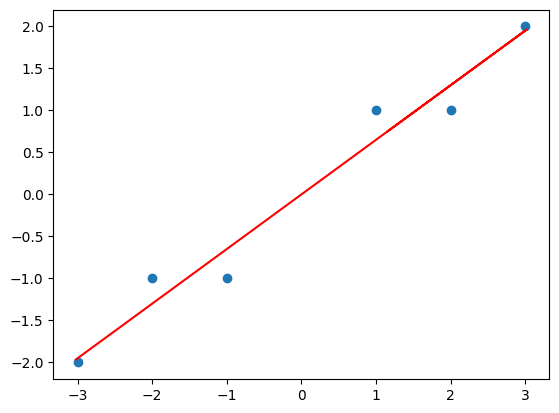

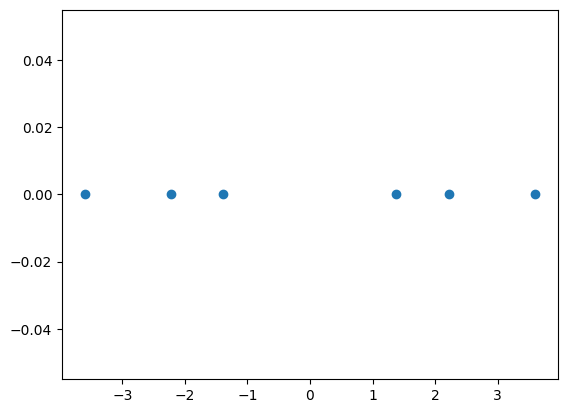

In [ ]:
# PCA in scikit-learn

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = np.array([[1, 1], [2, 1], [3, 2], [-1, -1], [-2, -1], [-3, -2]])

pca_1 = PCA(n_components=1)
pca_1.fit(X)
pca_1.explained_variance_ratio_
X_trans_1 = pca_1.transform(X)
X_reduced_1 = pca_1.inverse_transform(X_trans_1)

# Fitted PCA
plt.scatter(X[:, 0], X[:, 1])
plt.plot(X_reduced_1[:, 0], X_reduced_1[:, 1], c="r")
plt.show()

# Transformed into 1D
plt.scatter(X_trans_1[:, 0], [0]*len(X_trans_1))
plt.show()